In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
files.upload()

!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d grouplens/movielens-20m-dataset

from zipfile import ZipFile
file_name="movielens-20m-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')
  

Saving kaggle.json to kaggle.json
 97% 190M/195M [00:03<00:00, 48.6MB/s]
100% 195M/195M [00:03<00:00, 60.8MB/s]
done


In [0]:
# we need following as column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('rating.csv')
df.head()

df.rename(columns={'userId':'user_id','movieId':'item_id'},inplace=True)
df.head()

,user_id,item_id,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [0]:
movie_titles = pd.read_csv("movie.csv")
movie_titles.head()

# 1st column name was not item_id so renaming it as we need same column name to do further operations
movie_titles.rename(columns={'movieId':'item_id'},inplace=True)
movie_titles.head()

,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
df = pd.merge(df,movie_titles,on='item_id')
del movie_titles

df.head()

,user_id,item_id,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Codes of Gender, The (2010)               5.0
Poison (1951)                             5.0
Barchester Chronicles, The (1982)         5.0
Prom Queen: The Marc Hall Story (2004)    5.0
Argentina latente (2007)                  5.0
Name: rating, dtype: float64

In [0]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [0]:
ratings = pd.DataFrame(df.groupby(['item_id','title'])['rating'].mean())
ratings.head()

,,rating
item_id,title,
1,Toy Story (1995),3.921240
2,Jumanji (1995),3.211977
3,Grumpier Old Men (1995),3.151040
4,Waiting to Exhale (1995),2.861393
5,Father of the Bride Part II (1995),3.064592


In [0]:
ratings['numofratings'] = pd.DataFrame(df.groupby(['item_id','title'])['rating'].count())
ratings.drop('num of ratings',axis=1,inplace=True)
ratings.head()

,,rating,numofratings
item_id,title,,
1,Toy Story (1995),3.921240,49695
2,Jumanji (1995),3.211977,22243
3,Grumpier Old Men (1995),3.151040,12735
4,Waiting to Exhale (1995),2.861393,2756
5,Father of the Bride Part II (1995),3.064592,12161


In [0]:
ratings['numofratings'].max()
ratings.shape

del tt
quantile=ratings['numofratings'].quantile(0.8819)

ratings.dtypes

# tt=[ij for ij in ratings if ij[3] >= int(quantile)]  
ratings1=ratings[ratings["numofratings"] >= int(quantile)]
# quantile 0.8819 is equal to 1000 so we filter out reviews like minimum no of ratings required is 1000
ratings.shape
ratings1.shape
ratings1.head(20)

,,rating,numofratings
item_id,title,,
1,Toy Story (1995),3.921240,49695
2,Jumanji (1995),3.211977,22243
3,Grumpier Old Men (1995),3.151040,12735
4,Waiting to Exhale (1995),2.861393,2756
5,Father of the Bride Part II (1995),3.064592,12161
6,Heat (1995),3.834930,23899
7,Sabrina (1995),3.366484,12961
8,Tom and Huck (1995),3.142049,1415
9,Sudden Death (1995),3.004924,3960


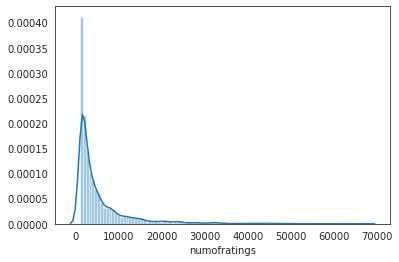

In [0]:
sns.distplot(ratings1['numofratings'],bins=100)
# if you dont want kernal density function line then add a parameter "kde=False" 

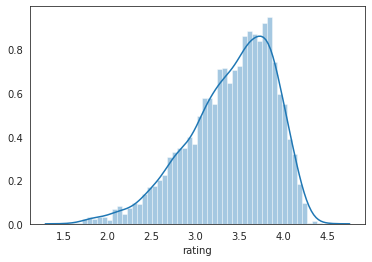

In [0]:
sns.distplot(ratings1['rating'],bins=50)

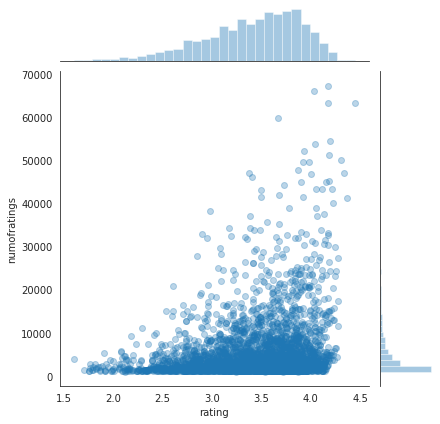

In [0]:
sns.jointplot(x='rating',y='numofratings',data=ratings1,alpha=0.3)

In [0]:
df.head()

df1=df[df.item_id.isin(list(ratings1["numofratings"]))]

df.shape  #(20000263, 6)
df1.shape #(5195819, 6)

df1.head(100)

,user_id,item_id,rating,timestamp,title,genres
713973,1,1009,3.5,2005-04-02 23:53:33,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
713974,156,1009,3.0,2002-11-26 20:11:56,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
713975,169,1009,4.0,1999-12-19 04:26:37,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
713976,170,1009,4.0,1999-10-18 13:28:55,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
713977,251,1009,2.0,2000-08-03 04:59:10,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
...,...,...,...,...,...,...
714068,4215,1009,4.0,2000-05-17 01:25:25,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
714069,4217,1009,2.5,2010-01-22 06:34:12,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
714070,4295,1009,3.0,2001-05-05 15:39:04,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
714071,4324,1009,4.0,1998-07-20 13:21:28,Escape to Witch Mountain (1975),Adventure|Children|Fantasy


In [0]:
moviemat = df1.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()
nam=list(moviemat.columns)

['1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '12 Angry Men (1957)',
 '187 (One Eight Seven) (1997)',
 "2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967)",
 '20,000 Leagues Under the Sea (1954)',
 '24 7: Twenty Four Seven (1997)',
 '28 Days Later (2002)',
 '3 Ninjas Knuckle Up (1995)',
 '3 Ninjas: High Noon On Mega Mountain (1998)',
 '4 Little Girls (1997)',
 '52 Pick-Up (1986)',
 '7th Voyage of Sinbad, The (1958)',
 '8 1/2 (8½) (1963)',
 '84 Charing Cross Road (1987)',
 '8MM (1999)',
 '976-EVIL (1989)',
 'A.I. Artificial Intelligence (2001)',
 'About Adam (2000)',
 'Accident (1967)',
 'Accidental Tourist, The (1988)',
 'Aces: Iron Eagle III (1992)',
 'Acid House, The (1998)',
 'Addams Family, The (1991)',
 'Addicted to Love (1997)',
 'Adrenalin: Fear the Rush (1996)',
 'Adventures of Huck Finn, The (1993)',
 'Affair of the Necklace, The (2001)',
 'Affl

In [0]:
ratings.sort_values('numofratings',ascending=False).head(10)

,,rating,numofratings
item_id,title,,
296,Pulp Fiction (1994),4.174231,67310
356,Forrest Gump (1994),4.029000,66172
318,"Shawshank Redemption, The (1994)",4.446990,63366
593,"Silence of the Lambs, The (1991)",4.177057,63299
480,Jurassic Park (1993),3.664741,59715
260,Star Wars: Episode IV - A New Hope (1977),4.190672,54502
110,Braveheart (1995),4.042534,53769
589,Terminator 2: Judgment Day (1991),3.931954,52244
2571,"Matrix, The (1999)",4.187186,51334


In [0]:
ratings.head()

,,rating,numofratings
item_id,title,,
1,Toy Story (1995),3.921240,49695
2,Jumanji (1995),3.211977,22243
3,Grumpier Old Men (1995),3.151040,12735
4,Waiting to Exhale (1995),2.861393,2756
5,Father of the Bride Part II (1995),3.064592,12161


In [0]:
jurassic_user_ratings = moviemat['Jurassic Park III (2001)']   # you can select any movie that in list "nam"
jurassic_user_ratings.head()
jurassic_user_ratings.value_counts()  # just to see how many viewers has rated

3.0    1832
2.0    1223
2.5     792
4.0     782
3.5     625
1.0     608
1.5     353
0.5     210
5.0     135
4.5     108
Name: Jurassic Park III (2001), dtype: int64

In [0]:

similar_to_jurassic = moviemat.corrwith(jurassic_user_ratings)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [0]:
corr_jurassic = pd.DataFrame(similar_to_jurassic,columns=['Correlation'])
corr_jurassic.dropna(inplace=True)
corr_jurassic.head()

,Correlation
title,
"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",-0.155606
101 Dalmatians (1996),0.319841
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.246100
12 Angry Men (1957),0.064906
187 (One Eight Seven) (1997),0.126115


In [0]:
corr_jurassic.sort_values('Correlation',ascending=False).head(10)
# this top 10 movies are similar to jurassic movie based on users so these will be recommended

,Correlation
title,
"Little Bit of Soul, A (1998)",1.000000
Two Men Went to War (2003),1.000000
"Brother's Kiss, A (1997)",1.000000
Squeeze (1997),1.000000
Bird of Prey (1996),1.000000
Under the Lighthouse Dancing (1997),1.000000
Jurassic Park III (2001),1.000000
Always Tell Your Wife (1914),0.944911
"Associate, The (Associé, L') (1979)",0.935144
